### Is binary classification really that important?
Let's see a little example

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

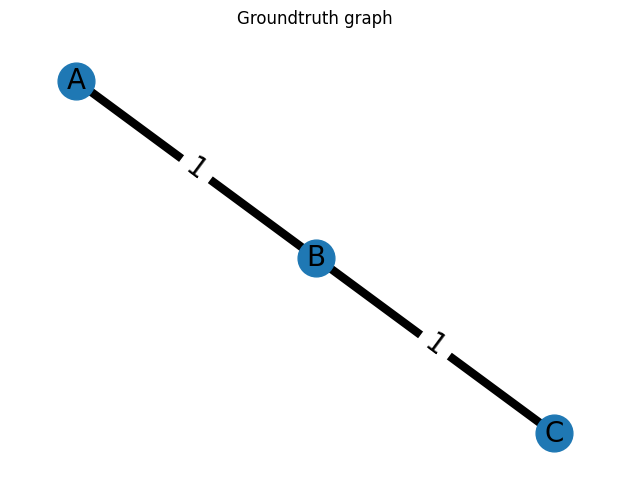

<Figure size 640x480 with 0 Axes>

In [14]:
G = nx.Graph()

G.add_edge("A","B",weight=1)
G.add_edge("B","C",weight=1)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.title("Groundtruth graph")
plt.show()
plt.savefig("binary_path.png")

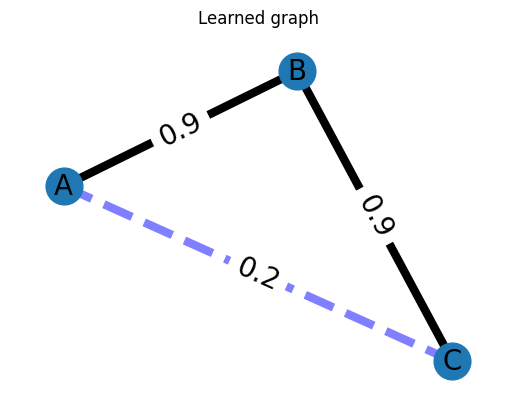

<Figure size 640x480 with 0 Axes>

In [31]:
G = nx.Graph()

G.add_edge("A","B",weight=0.9)
G.add_edge("B","C",weight=0.9)
G.add_edge("A","C",weight=0.2)



elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.title("Learned graph")
plt.show()
plt.savefig("_path.png")

Nevertheless, even though the two graphs are topologically different, they evolve the signals in equal fashion, we can even measure the MSE of the evolved deltas when deleting the $k$-th least weighted edge in a graph.

In [129]:
import sys
sys.path.insert(1,'..')
import learnHeat as lh
import numpy as np

N = 40

L = lh.heat_graph_BA(N)
X = lh.create_deltas(L,[1])
res = lh.learn_heat(X,tau0=[1],alpha=0.01,beta=0.1,max_iter=50) 
L_learned = res["L"]    

In [133]:
aux3 = np.copy(L_learned)
aux = np.copy(aux3)
aux[aux<0] = -1
edges = int(-np.sum(np.sum(aux)))

In [131]:
edges

1520

In [132]:
mse = []

for _ in range(edges):
    X2 = lh.create_deltas(L_learned,[1])
    mse.append(np.linalg.norm(X-X2,'fro')/N)
    largest_negative = np.max(L_learned[L_learned<0])
    print(largest_negative)
    L_learned[L_learned==largest_negative]=0
L_learned = np.copy(aux3)

-2.1991092577132822e-07
-2.1998869002075528e-07
-0.0002615103441288444
-0.0002615103442327962
-0.0017447915900752188
-0.001744791590099908
-0.00206850970586477
-0.002068509707812727
-0.002217569959270238
-0.0022175699592764664
-0.0027540697445388265
-0.0027540697445410816
-0.003711732460137573
-0.0037117324601402472
-0.0038625590445888845
-0.0038625590445913287
-0.004570012928963558
-0.004570012930800023
-0.004575496250055088
-0.004575496250059834
-0.004758683883356006
-0.00475868388336059
-0.004767866614853372
-0.004767866614856867
-0.004785768288812025
-0.004785768288815627
-0.0048474650988945146
-0.004847465098898008
-0.004857590852681357
-0.004857590854628093
-0.0049899328142772115
-0.004989932814281076
-0.005324319552553083
-0.005324319552555795
-0.005399050605616735
-0.005399050605619839
-0.005403762116468054
-0.005403762116471228
-0.005475437839378066
-0.005475437839381121
-0.005578319369734817
-0.005578319369737886
-0.005666319665083527
-0.00566631966508666
-0.00569705023808302

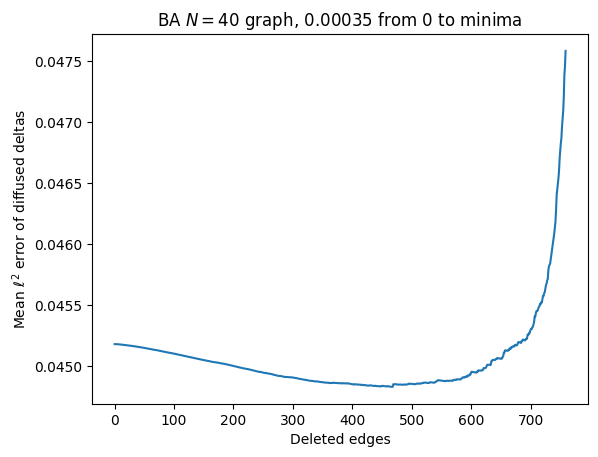

In [134]:
plt.plot(range(edges//2),mse[0::2])
plt.xlabel("Deleted edges")
plt.ylabel("Mean $\ell^2$ error of diffused deltas")
difference = round(abs(mse[0]-min(mse)),5)
plt.title(f"BA $N=40$ graph, {difference} from 0 to minima")
plt.savefig(f"BA_N_40_diff{difference}.png")